/tmp/ipykernel_1234730/1402266519.py:193: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad=0.4)


'./figures/motivating_intro_onecol.png'

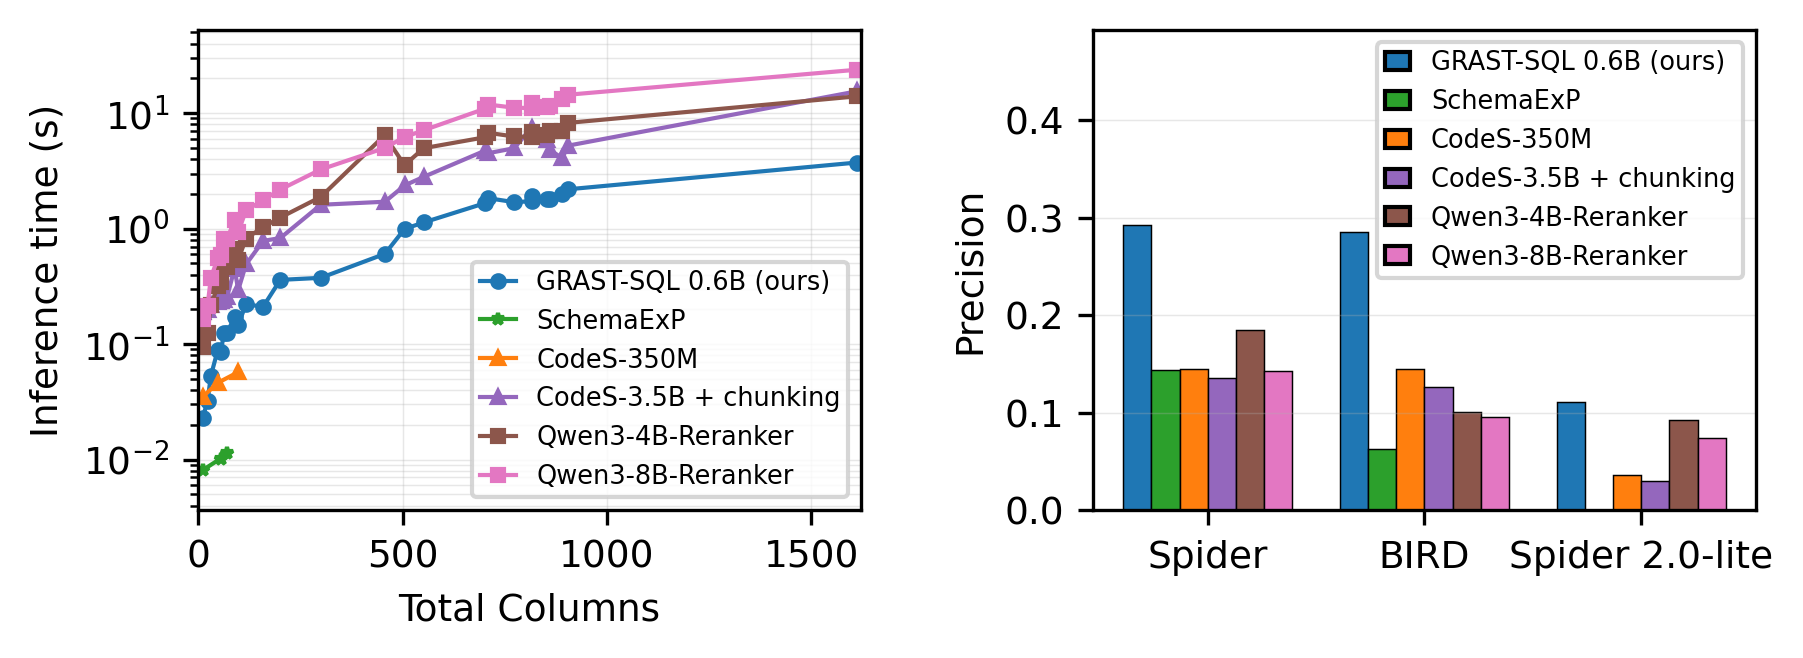

In [20]:
# motivating_intro_onecol.py
# Two-panel figure (horizontal) that fits ONE column in a two-column paper.
# Left: inference time vs. #columns (no in-figure text, only labels/legend).
# Right: precision bars for 3 methods on Spider Dev vs BIRD Dev.
# Colors match the runtime chart: GRAST-SQL (ours)=C0, CodeS=C1, SchemaExp=C2.

import os
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------------------------------------------------
# Output dir
# ---------------------------------------------------------------------
os.makedirs("./figures", exist_ok=True)

# ---------------------------------------------------------------------
# Data — Runtime (Left panel)
# ---------------------------------------------------------------------
ours_data = [(89, 0.173), (55, 0.086), (11, 0.023), (117, 0.221), (71, 0.125), (31, 0.053), (98, 0.147), (201, 0.36), (64, 0.126), (48, 0.089), (23, 0.032), (457, 0.605), (159, 0.211), (300, 0.375), 
# (456, 1.563), 
(505, 0.994), (552, 1.132), (701, 1.659), (710, 1.835), (773, 1.697), (816, 1.728), (817, 1.899), (854, 1.799), (860, 1.81), (891, 2.006), (905, 2.192), (1612, 3.739)]#, (1664, 4.515), (2100, 5.304), (2141, 4.003), (2148, 5.675), (2524, 7.906), (2549, 5.178), (2650, 7.543), (2869, 6.038), (3088, 7.589), (3289, 7.931), (3521, 9.294), (3610, 7.886), (3686, 10.38), (3789, 8.981), (3899, 9.022), (4008, 10.347), (5421, 14.762), (6066, 15.226), (14433, 25.092), (23067, 51.863)]
schemaexp_data  =  [ 
    #  (6,  0.006), 
    (55,  0.0102),  
    (11,  0.0081),  
    (71,  0.0114),  
    # (31,  0.0086),  
    # (64,  0.0119),  
    # (48,  0.0101), 
    # (23,  0.0085),
]
codes_data = [
    # (6, 0.01), 
    # (89, 0.0586), 
    # (55, 0.0469), 
    (11, 0.0349), 
    # (71, 0.0513), 
    # (31, 0.0429), 
    (98, 0.0572), 
    # (64, 0.0473), 
    (48, 0.0462), 
    # (23, 0.0375), 
]
# codes_data with chunking
codes_data_chunking = [(89, 0.1306), (55, 0.0775), (11, 0.0365), (117, 0.1406), (71, 0.073), (31, 0.0487), (98, 0.0995), (201, 0.2353), (64, 0.1144), (48, 0.0576), (23, 0.041), (457, 0.5227), (159, 0.4085), (300, 0.2169), (6, 0.0367)] 
codes3b_data  =  [(89, 0.4517), (55, 0.2351), (11, 0.1902), (117, 0.4901), (71, 0.2576), (31, 0.2187), (98, 0.2936), (201, 0.8287), (64, 0.2414), (48, 0.2334), (23, 0.198), (457, 1.7105), (159, 0.7841), (300, 1.6097), (6, 0.184), 
# (456, 1.9525),
 (505, 2.3671), (552, 2.8113), (701, 4.7231), (710, 4.5047), (773, 4.9733), (816, 7.4762), (817, 7.2009), (854, 5.8513), (860, 4.8207), (891, 4.0786), (905, 5.2344), (1612, 15.473)]#, (1664, 9.1352), (2100, 12.6249), (2141, 6.3707), (2148, 9.8369), (2524, 14.8484), (2549, 12.0808), (2650, 16.9792), (2869, 14.1153), (3088, 9.5476), (3289, 14.5556), (3521, 5.2344), (3610, 18.1649), (3686, 22.3528), (3789, 13.2164), (3899, 13.1287), (4008, 25.7332), (5421, 35.7066), (6066, 35.2677), (14433, 95.2114), (23067, 287.977)]
qwen4b_reranker_data = [(89, 0.668), (55, 0.346), (11, 0.095), (117, 0.821), (71, 0.466), (31, 0.217), (98, 0.538), (201, 1.248), (64, 0.473), (48, 0.317), (23, 0.124), 
# (457, 2.875),
 (159, 1.03), (300, 1.883), (456, 6.431), (505, 3.553), (552, 4.978), (701, 6.179), (710, 6.757), (773, 6.285), (816, 6.233), (817, 6.941), (854, 6.51), (860, 6.971), (891, 7.078), (905, 8.245), (1612, 14.001)]#, (1664, 13.69), (2100, 18.716), (2141, 14.168), (2148, 20.605), (2524, 26.266), (2549, 19.059), (2650, 28.165), (2869, 22.226), (3088, 25.439), (3289, 37.044), (3521, 34.069), (3610, 28.459), (3686, 35.872), (3789, 33.043), (3899, 39.784), (4008, 37.456), (5421, 52.74), (6066, 54.146), (14433, 91.418), (23067, 185.799)]
qwen8b_reranker_data = [(89, 1.185), (55, 0.597), (11, 0.166), (117, 1.438), (71, 0.816), (31, 0.374), (98, 0.934), (201, 2.183), (64, 0.817), (48, 0.556), (23, 0.215), (457, 5.005), (159, 1.769), (300, 3.254), 
# (456, 11.4), 
(505, 6.208), (552, 7.121), (701, 10.909), (710, 11.892), (773, 11.148), (816, 11.087), (817, 12.217), (854, 11.393), (860, 11.563), (891, 13.364), (905, 14.449), (1612, 23.796)]#, (1664, 24.22), (2100, 32.57), (2141, 25.028), (2148, 36.024), (2524, 46.626), (2549, 33.741), (2650, 48.458), (2869, 38.701), (3088, 44.858), (3289, 62.948), (3521, 61.307), (3610, 51.048), (3686, 62.768), (3789, 57.715), (3899, 69.172), (4008, 65.446), (5421, 93.113), (6066, 95.608), (14433, 158.53), (23067, 326.605)]

def unzip(pairs):
    xs = [p[0] for p in pairs]
    ys = [p[1] for p in pairs]
    return xs, ys

x_ours, y_ours       = unzip(sorted(ours_data, key=lambda x: x[0]))
x_codes, y_codes     = unzip(sorted(codes_data, key=lambda x: x[0]))
x_schema, y_schema   = unzip(sorted(schemaexp_data, key=lambda x: x[0]))
x_codes_chunking, y_codes_chunking = unzip(sorted(codes_data_chunking, key=lambda x: x[0]))
x_codes3b, y_codes3b = unzip(sorted(codes3b_data, key=lambda x: x[0]))
x_qwen4b_reranker, y_qwen4b_reranker = unzip(sorted(qwen4b_reranker_data, key=lambda x: x[0]))
x_qwen8b_reranker, y_qwen8b_reranker = unzip(sorted(qwen8b_reranker_data, key=lambda x: x[0]))
# ---------------------------------------------------------------------
# Data — Precision (Right panel)
# ---------------------------------------------------------------------

prec_data = [ # (method, prec_spider, prec_bird, spider 2.0-lite, color)
    ("GRAST-SQL 0.6B (ours)", 0.293, 0.285, 0.111, "C0"),
    ("SchemaExP", 0.144, 0.063, 0., "C2"),
    ("CodeS-350M", 0.145, 0.145, 0.0357, "C1"),
    # ("CodeS + chunking", 0.151, 0.146, "C3"),
    ("CodeS-3.5B + chunking", 0.136, 0.126, 0.03, "C4"),
    ("Qwen3-4B-Reranker", 0.185, 0.101, 0.093, "C5"),
    ("Qwen3-8B-Reranker", 0.143, 0.096, 0.074, "C6"),
]

methods = [m for m, _, _, _, _ in prec_data]
colors  = [c for _, _, _, _, c in prec_data]
prec_spider = [p[1] for p in prec_data]
prec_bird   = [p[2] for p in prec_data]
prec_spider_2_0_lite = [p[3] for p in prec_data]

x = np.arange(len(methods))
bar_width = 0.42

# ---------------------------------------------------------------------
# Figure — one column wide, two panels
# Typical single-column width ≈ 3.35 in. Adjust height as needed.
# ---------------------------------------------------------------------
fig, (axL, axR) = plt.subplots(
    1, 2, figsize=(6.7, 2.6), dpi=300, gridspec_kw={"wspace": 0.35}
)

# =========================
# Left panel: Runtime plot
# =========================
marker_size = 3
axL.plot(x_ours,  y_ours,  marker='o', linewidth=1.0, label='GRAST-SQL 0.6B (ours)', color='C0', markersize=marker_size)
axL.plot(x_schema, y_schema, marker='*', linewidth=1.0, label='SchemaExP', color='C2', markersize=marker_size)
axL.plot(x_codes, y_codes, marker='^',  linewidth=1.0, label='CodeS-350M', color='C1', markersize=marker_size)
axL.plot(x_codes3b, y_codes3b, marker='^',linewidth=1.0, label='CodeS-3.5B + chunking', color='C4', markersize=marker_size)
axL.plot(x_qwen4b_reranker, y_qwen4b_reranker, marker='s',  linewidth=1.0, label='Qwen3-4B-Reranker', color='C5', markersize=marker_size)
axL.plot(x_qwen8b_reranker, y_qwen8b_reranker, marker='s', linewidth=1.0, label='Qwen3-8B-Reranker', color='C6', markersize=marker_size)

# Vertical limits and shading (no text labels)
# codes_limit, schema_limit = 201, 250
max_x = max(x_ours)
# axL.axvline(codes_limit,  linestyle=':', linewidth=0.8, color='0.4')
# axL.axvline(schema_limit, linestyle=':', linewidth=0.8, color='0.4')
# axL.axvspan(codes_limit, max_x, alpha=0.06, color='0.7')


axL.set_yscale('log')
axL.set_xlabel('Total Columns', fontsize=9)
axL.set_ylabel('Inference time (s)', fontsize=9)
axL.grid(True, which='both', linewidth=0.35, alpha=0.3)
axL.set_xlim(left=0, right=max_x + 10)
axL.margins(y=0.10)
axL.tick_params(labelsize=9)
axL.legend(loc='lower right', fontsize=6.15, frameon=True, handlelength=1.4, borderpad=0.3)

# =========================
# Right panel: Precision bars
# =========================
# =========================
# Right panel: Precision bars (2 groups × 3 methods)
# =========================
from matplotlib.patches import Patch

group_labels   = ['Spider', 'BIRD', 'Spider 2.0-lite']
group_centers  = np.arange(len(group_labels))          # [0, 1]
n_methods      = len(methods)                           # 3
group_width    = 0.78                                   # total width per group
bar_width      = group_width / n_methods
offsets        = (np.arange(n_methods) - (n_methods-1)/2) * bar_width

# Clear any previous bars on axR if re-running the cell
axR.cla()

# Draw bars per method at both groups
for i, (m, c, off) in enumerate(zip(methods, colors, offsets)):
    # Spider group
    axR.bar(group_centers[0] + off,
            prec_spider[i],
            width=bar_width,
            color=c,
            edgecolor='black',
            linewidth=0.35)
    # BIRD group
    axR.bar(group_centers[1] + off,
            prec_bird[i],
            width=bar_width,
            color=c,
            edgecolor='black',
            linewidth=0.35)
    # Spider 2.0-lite group
    axR.bar(group_centers[2] + off,
            prec_spider_2_0_lite[i],
            width=bar_width,
            color=c,
            edgecolor='black',
            linewidth=0.35)

# Axes styling
axR.set_ylabel('Precision', fontsize=9)
axR.set_xticks(group_centers)
axR.set_xticklabels(group_labels, fontsize=9)
axR.tick_params(labelsize=9)
axR.set_ylim(0, max(prec_spider + prec_bird) + 0.2)
axR.grid(axis='y', linewidth=0.35, alpha=0.3)

# Legend for methods (colors match the runtime chart)
method_handles = [Patch(facecolor=c, edgecolor='black', label=m) for m, c in zip(methods, colors)]
axR.legend(handles=method_handles,
        #    title='Method',
           loc='upper right',
           fontsize=6.15,
        #    title_fontsize=6,
           frameon=True,
           handlelength=1.0,
           borderpad=0.3)

# ---------------------------------------------------------------------
# Save
# ---------------------------------------------------------------------
out_png = "./figures/motivating_intro_onecol.png"
# out_pdf = "./figures/motivating_intro_onecol.pdf"
plt.tight_layout(pad=0.4)

# shrink axes height to leave more room for legend/text
for ax in (axL, axR):
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width, box.height*0.8])

plt.savefig(out_png, bbox_inches='tight')
# plt.savefig(out_pdf, bbox_inches='tight')
out_png
